# Algoritmo del Perceptrón

El algoritmo del perceptrón aprende los parámetros a partir de la iteración a partir de una regla de actualización basada en una interpretación del ángulo entre los vectores ejemplos y el vector de pesos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problema AND

Consideremos la siguiente distribución de los datos. Tenemos que se asigna la clase 1 sólo cuando están presente los valores en ambas entradas; esto define el problema AND. Sólo sí $x=1$ y $y=1$ se activará la neurona. Estos datos son linealmente separables:

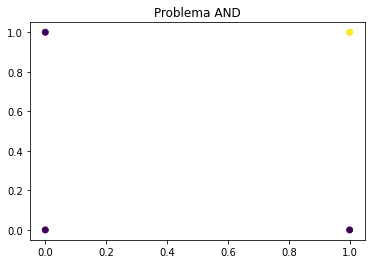

In [2]:
#Puntos en un cuadrado en R2
X = np.array([[0,1],[1,0],[0,0],[1,1]])
#Definición de problema AND
Y = np.array([0,0,0,1])

plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Problema AND')
plt.show()

Para hacer sencillo el procesamiento, añadimos una columna más a los datos. Esta columna representa el bias y, por tanto, es siempre igual a 1. Esto lo hacemos para considerar el bias como una variable de entrada, por lo que el vector $w$ que buscaremos  será de la forma $w^T = \begin{pmatrix} w_1 & w_2 & b \end{pmatrix}$. Es decir, determinaremos el bias junto con los pesos de las conexiones.

In [3]:
#dimensiones de los datos
m,n = X.shape
#Se agrega un 1 a cada vector
#Este representará el bias
X1 = np.append(X,np.ones((m,1)),axis=1)

### Entrenamiento del perceptrón

Para que el perceptrón funcione de manera adecuada, necesitamos obtener los parámetros adecuados de la red. Para esto, utilizaremos la regla de actualización del perceptrón.

Antes de esto, debemos definir los hiperparámetros. Los hiperparámetros, en este caso son: (1) el rango de aprendizaje; y (2) el número máximo de iteraciones.

In [4]:
#HIPERPARÁMETROS
l = 1         #Rango de aprendizaje
k = 10      #Num. maximo de iteraciones

Asimismo, definimos la función de decisión.  En este caso, el algoritmo corre las predicciones de las clases de los datos a partir de los parámetros en ese estado: $$f(x) = \begin{cases} 1 & \text{ si } w\cdot x + b > 0 \\  0 & \text{ si } w\cdot x + b \leq 0 \end{cases}$$

In [5]:
#Función de decisión
f = lambda x, theta: (np.dot(x,theta) >= 0).astype(np.int)

En cada iteración, cada nuevo parámetro se calcula como: $$ w_i \leftarrow w_i - \eta (f(x^{(k)}) - y_k) x^{(k)}_i$$

En particular, se nota que lo hace por cada uno de los $N$ ejemplos. Entonces, en general, podemos ver que para todos los datos de entrenamiento, el proceso de actualización es:

$$w_i \leftarrow w_i - \eta \sum_{k=1}^N(f(x^{(k)}) - y_k) x^{(k)}_i$$

El algoritmo se detiene cuando alcanza un error igual a 0 o cuando se ha alcanzado el máximo número de iteraciones.

Iniciamos los parámetros de forma aleatoria. En este caso, el vector de incio es $w = (1,1)^T$ y el bias es $b = 1$.

In [6]:
#Inicializción de parametros
w = np.ones(n+1)

#Iteración
t = 1
stop = False
while  stop == False:
    #FORWARD
    #Funcion de prediccion
    pred = f(X1,w) 
    #Error
    err =  pred - Y
    
    #ACTUALIZACIÓN
    #Gradiente descendiente
    w -= l*((X1.T * err).T).sum(0)
    
    print('Estado', t, '\t prediccion', pred, '\t', end=" ")
    print('parametros', w)
    
    t += 1
    #Criterio de paro
    if (pred - Y).sum(0) == 0 or t > k: 
        stop = True

Estado 1 	 prediccion [1 1 1 1] 	 parametros [ 0.  0. -2.]
Estado 2 	 prediccion [0 0 0 0] 	 parametros [ 1.  1. -1.]
Estado 3 	 prediccion [1 1 0 1] 	 parametros [ 0.  0. -3.]
Estado 4 	 prediccion [0 0 0 0] 	 parametros [ 1.  1. -2.]
Estado 5 	 prediccion [0 0 0 1] 	 parametros [ 1.  1. -2.]


A partir de este algoritmo, hemos aprendido los parámetros de la red que clasifican de forma adecuada los datos de entrada.

### Visualización

Podemos ver que el perceptrón es un clasificador lineal. Esto es, crea un hiperplano en el espacio, de tal forma que todo lo que se encuentre arriba de este hiperpano pertenece a una clase, mientras que lo que se encuentre por debajo pertenece a la clase contraria. Para visalizar esto, debemos notar que la recta que define el vector de pesos $w$ y el bias $b$ está dada por el conjunto $l =\{v : w\cdot v = -b\}$.

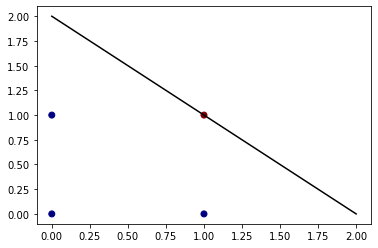

In [7]:
#Puntos extremos de la recta
xs = [0, -w[2]/w[0]]
ys = [-w[2]/w[1], 0]

#Recta de decisión
plt.plot(xs,ys,'k-')
#Ploteo
plt.scatter(X[:,0],X[:,1],c=f(X1,w), cmap='jet')
plt.show()

### El problema XOR

El problema XOR es un problema que no puede solucionarse por el perceptrón; esto se debe a que no se trata de un problema linealmente separable.

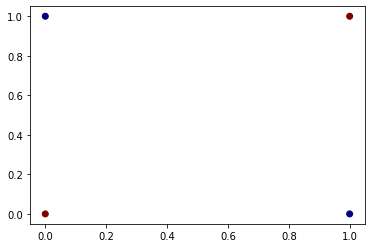

In [8]:
Y_XOR = np.array([0,0,1,1])

plt.scatter(X[:,0], X[:,1], c=Y_XOR, cmap='jet')
plt.show()

Podemos entrenar un perceptrón; sin embargo, el algoritmo no llegará a converger (por esto, es importante considerar un número máximo de iteraciones).

In [9]:
#Inicializción de parametros
w_xor = np.ones(n+1)

#Hiperparametros
l = 0.01         #Rango de aprendizaje
k = 99      #Num. maximo de iteraciones

t = 1         #Iteracion inicial
stop = False  #Criterio de paro
while  stop == False:
    pred = f(X1,w_xor)       #Funcion de prediccion
    err =  pred - Y_XOR              #Error 
    w_xor -= l*((X1.T * err).T).sum(0) #Actualizacion de los parametros w
    
    if t%10 == 0:
        print('Estado', t, '\t prediccion', pred, '\t', end=" ")
        print('parametros', w_xor)
        
    t += 1
    if (pred - Y_XOR).sum(0) == 0 or t > k: #Criterio de paro
        stop = True

Estado 10 	 prediccion [1 1 1 1] 	 parametros [0.9 0.9 0.8]
Estado 20 	 prediccion [1 1 1 1] 	 parametros [0.8 0.8 0.6]
Estado 30 	 prediccion [1 1 1 1] 	 parametros [0.7 0.7 0.4]
Estado 40 	 prediccion [1 1 1 1] 	 parametros [0.6 0.6 0.2]
Estado 50 	 prediccion [1 1 1 1] 	 parametros [ 5.00000000e-01  5.00000000e-01 -6.17561557e-16]
Estado 60 	 prediccion [1 1 0 1] 	 parametros [ 0.4  0.4 -0.1]
Estado 70 	 prediccion [1 1 0 1] 	 parametros [ 0.3  0.3 -0.2]
Estado 80 	 prediccion [1 1 0 1] 	 parametros [ 0.23  0.23 -0.24]
Estado 90 	 prediccion [0 0 0 1] 	 parametros [ 0.2  0.2 -0.2]


Podemos ver que la clasificación es incorrecta, el algoritmo nunca convergerá, pero tratará de minimizar el error. Esto implica que siempre habrá al menos un punto que no clasifique de manera correcta.

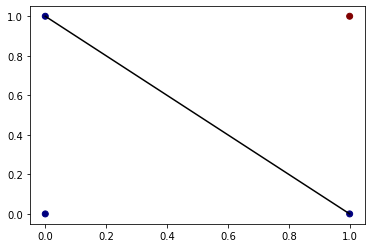

Clasificación: [0 0 0 1]
Parámetros: [ 0.17  0.17 -0.17]


In [10]:
#Limites de la decisión
x_xor = [0, -w_xor[2]/w_xor[0]] 
y_xor = [-w_xor[2]/w_xor[1], 0]

#Recta de decisión
plt.plot(x_xor,y_xor,'k-')
#Ploteo
plt.scatter(X[:,0],X[:,1],c=f(X1,w_xor), cmap='jet')
plt.show()

#Clases y pesos
print('Clasificación:', f(X1,w_xor))
print('Parámetros:', w_xor)

Para solucionar este problema, tendremos que utilizar un método más potente que el perceptrón: el perceptrón multicapa.